In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,30.00,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,31.50,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


In [9]:
df.bhk.isnull().sum()

0

In [10]:
df.bathroom.isnull().sum()

1217

In [11]:
df.age.isnull().sum()

891

In [12]:
df.bathroom.median()

2.0

In [15]:
df.bathroom = df.bathroom.fillna(df.bathroom.median())

In [16]:
df.bathroom.isnull().sum()

0

In [17]:
df.age = df.age.fillna(df.age.median())

In [19]:
df.age.isnull().sum()

0

In [20]:
from sklearn import svm
regr = svm.SVR(kernel = 'linear', C = 1.0)
regr.fit(df[['area','bhk']], df.price)

SVR(kernel='linear')

In [22]:
regr.coef_

array([[ 0.09266889, -6.29392665]])

In [23]:
regr.intercept_

array([-24.33506447])

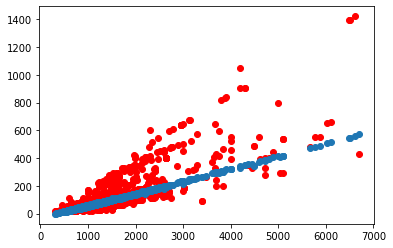

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.area,df.price,color = 'red')
plt.scatter(df.area, regr.predict(df[['area','bhk']]))

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df.price, regr.predict(df[['area','bhk']]))

5458.465754838204

# 3 variables

In [28]:
from sklearn import svm
regr = svm.SVR(kernel = 'linear', C = 1.0)
regr.fit(df[['area','bhk', 'bathroom']], df.price)

SVR(kernel='linear')

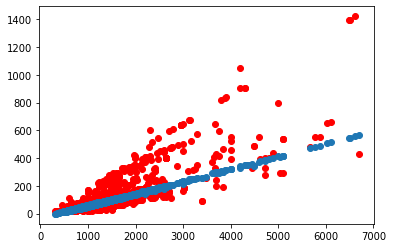

In [29]:
plt.scatter(df.area,df.price,color = 'red')
plt.scatter(df.area, regr.predict(df[['area','bhk', 'bathroom']]))

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df.price, regr.predict(df[['area','bhk','bathroom']]))

5475.789340925518